### Titanic dataset

Разбор данных про титаник с kaggle

### Структура
----
### 1. EDA
#### 1.1Предобработка
#### 1.2 Пропущенные значения 
#### 1.3 Обработка 
#### 1.4 Выводы из данных

### 2. Предсказание результата
#### 2.1 Сравнение моделей 

### 3. Выводы

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv('/Users/maximzabelin/Desktop/titanic/train.csv')
test = pd.read_csv('/Users/maximzabelin/Desktop/titanic/test.csv')


#### EDA.Предобработка

Посмотрим, что это за данные

In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Тут есть несколько ненужных столбцов:
- Embarked (какая разница из какого порта выехали)
- Cabin (номер каюты не важен, да еще есть столбец Pclass)
- Ticket (как номер билета влияет на выживаемость?)    
- Name (врядли имя в общем случае как-то влияет на выживаемость)
- PassengerId (это просто нумерация)

In [8]:
train.drop(columns=['Embarked', 'Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)
test.drop(columns=['Embarked', 'Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


#### EDA.Пропущенные значения

исходя из .info() в данных есть пропущенные значения, давайте посмотрим на них и исправим это

In [9]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [10]:
test.isna().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64

Заменю пропущенные значения в возрасте средним, тк их достаточно много и не хочется их выкидывать, а определеть восраст по другим столбцам я не хочу(не знаю как)

In [11]:
train['Age'].fillna(value=train['Age'].mean(), inplace=True)
test['Age'].fillna(value=test['Age'].mean(), inplace=True)

test.dropna(axis=0, inplace=True)


In [12]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [13]:
test.isna().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

#### EDA.Обработка

поковыряю данные чтобы с ними было удобней рабоать и можно было получить больше полезных штук

переведем Sex из строки в число

(тут конечно есть избыточность, если male=1, то ясно что female = 0, но оставлю так, с этим дальше будет проще анализировать)

In [14]:
train = pd.get_dummies(train, columns=['Sex'])
test = pd.get_dummies(test, columns=['Sex'])
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.000000,1,0,7.2500,0,1
1,1,1,38.000000,1,0,71.2833,1,0
2,1,3,26.000000,0,0,7.9250,1,0
3,1,1,35.000000,1,0,53.1000,1,0
4,0,3,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1
887,1,1,19.000000,0,0,30.0000,1,0
888,0,3,29.699118,1,2,23.4500,1,0
889,1,1,26.000000,0,0,30.0000,0,1


____
сделаем новый столбец family = sibsp(братья + сестры) + parch(дети + родители) + 1(сам человек)

a также столбец isalone = 1, if family = 1, else 0

этим сильнее выделим, что человек был один

In [15]:
for data in [train, test]:
    data['family'] = data['SibSp'] + data['Parch'] + 1
    data.drop(columns=['SibSp', 'Parch'], inplace=True)
    data['is_alone'] = data.family.apply(lambda x : 1 if x == 1 else 0)

train

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,family,is_alone
0,0,3,22.000000,7.2500,0,1,2,0
1,1,1,38.000000,71.2833,1,0,2,0
2,1,3,26.000000,7.9250,1,0,1,1
3,1,1,35.000000,53.1000,1,0,2,0
4,0,3,35.000000,8.0500,0,1,1,1
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,0,1,1,1
887,1,1,19.000000,30.0000,1,0,1,1
888,0,3,29.699118,23.4500,1,0,4,0
889,1,1,26.000000,30.0000,0,1,1,1


Теперь хочу разбить age и fare на отрезки (ну типа ребенок, взрослый, старый), думаю дискретное значение получше поможет определеить выживание (почему?)

для age использую cut

для fare использую qcut (cut by quantiles)

тк что такое старый понятно,  а что такое дорогой билет не очень

In [16]:
pd.cut(train['Fare'], 5).value_counts().to_frame().reset_index().sort_values(by='index')

,index,Fare
0,"(-0.512, 102.466]",838
1,"(102.466, 204.932]",33
2,"(204.932, 307.398]",17
4,"(307.398, 409.863]",0
3,"(409.863, 512.329]",3


In [17]:
pd.qcut(train['Fare'], 5).value_counts().to_frame().reset_index().sort_values(by='index')

,index,Fare
2,"(-0.001, 7.854]",179
0,"(7.854, 10.5]",184
4,"(10.5, 21.679]",172
1,"(21.679, 39.688]",180
3,"(39.688, 512.329]",176


In [18]:
le = LabelEncoder()

In [19]:
for data in [train, test]:
    data['Age'] = data['Age'].astype(int)
    data['Fare'] = data['Fare'].astype(int)
    data['age_bins'] = le.fit_transform(pd.cut(data['Age'], 5))
    data['fare_bins'] = le.fit_transform(pd.qcut(data['Fare'], 5))  
train.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,family,is_alone,age_bins,fare_bins
0,0,3,22,7,0,1,2,0,1,0
1,1,1,38,71,1,0,2,0,2,4
2,1,3,26,7,1,0,1,1,1,0
3,1,1,35,53,1,0,2,0,2,4
4,0,3,35,8,0,1,1,1,2,1


### EDA.Распределения

в этой секции заглянем внутрь данных и поймем, как они устроенны 

<AxesSubplot: >

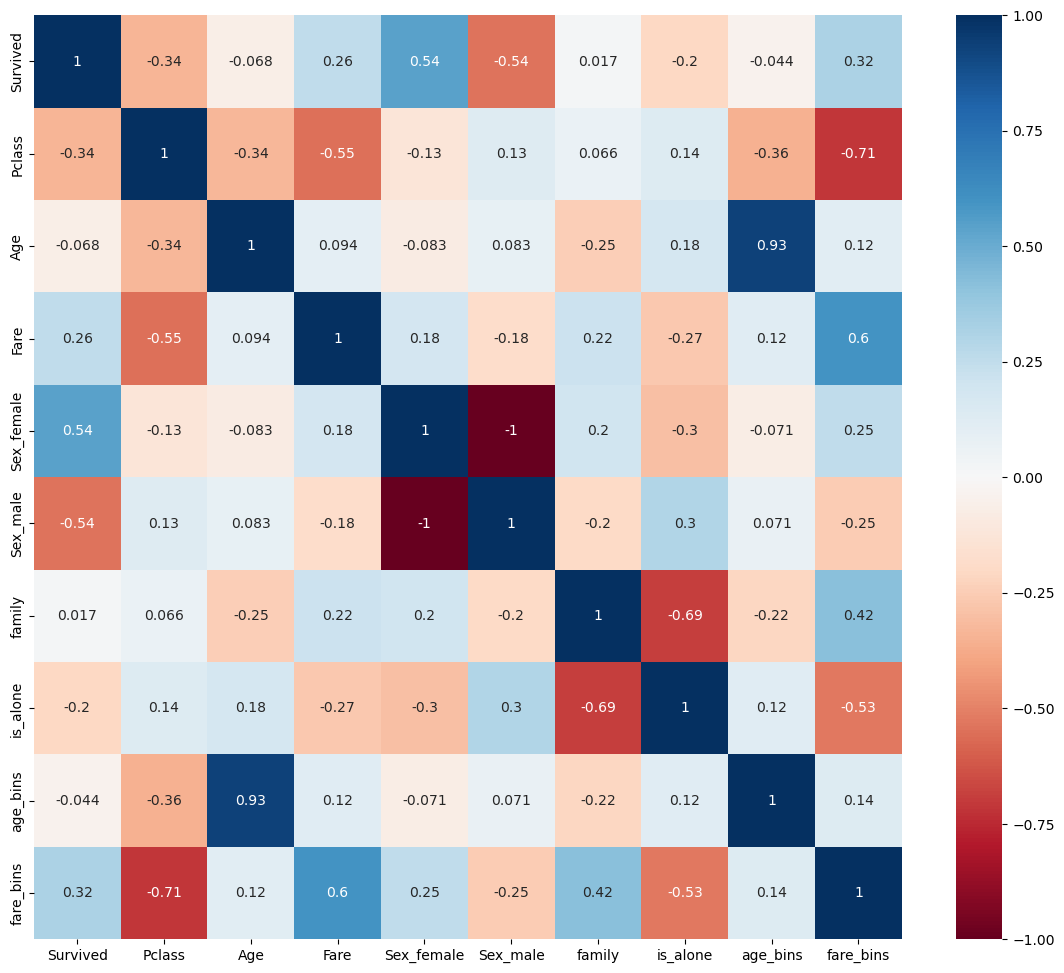

In [20]:
plt.figure(figsize=(14,12))
sns.heatmap(train.corr(), cmap='RdBu', annot=True)

из интересных зависимостей:
- выживаемость связанна с полом и ценой билета
- выживаемость не связанна с возрастом 
- возраст и класс немного кореллируют
- размер семьи коррелирует с возрастом и ценой билета

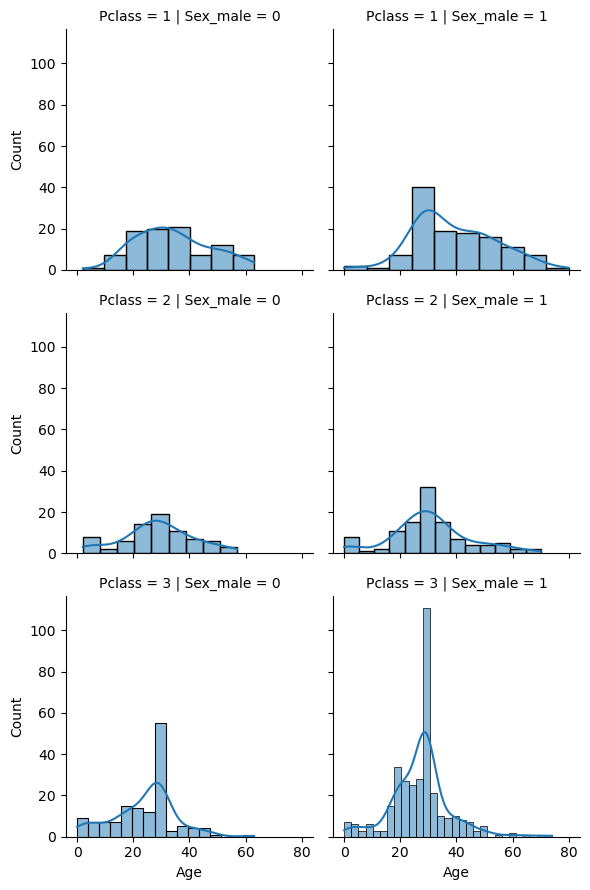

In [21]:
grid = sns.FacetGrid(data=train, row='Pclass', col='Sex_male')
grid.map(sns.histplot, 'Age', kde=True)

- больше всего старых в 1 классе
- в 2 и 3 классе ближе к среднему возрасту

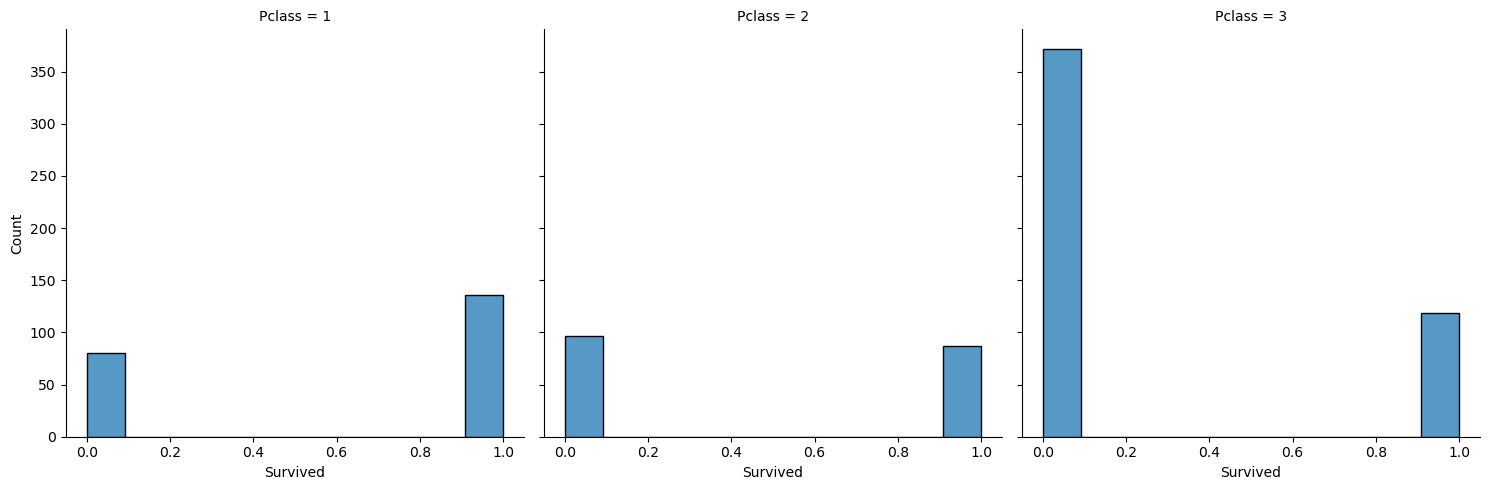

In [22]:
sns.displot(data=train,x='Survived', col='Pclass')

ну конечно больше всего выживших среди богачей (1 класс) и больще всего умерло людей из 3 класса

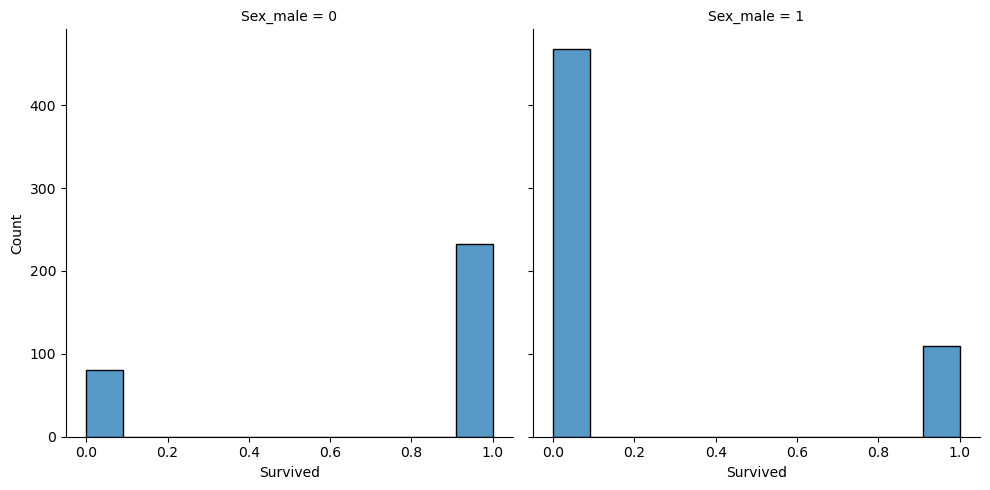

In [23]:
sns.displot(data=train,x='Survived', col='Sex_male')

тоже предсказуемо и логично: если ты женщина, шансов выжить больше

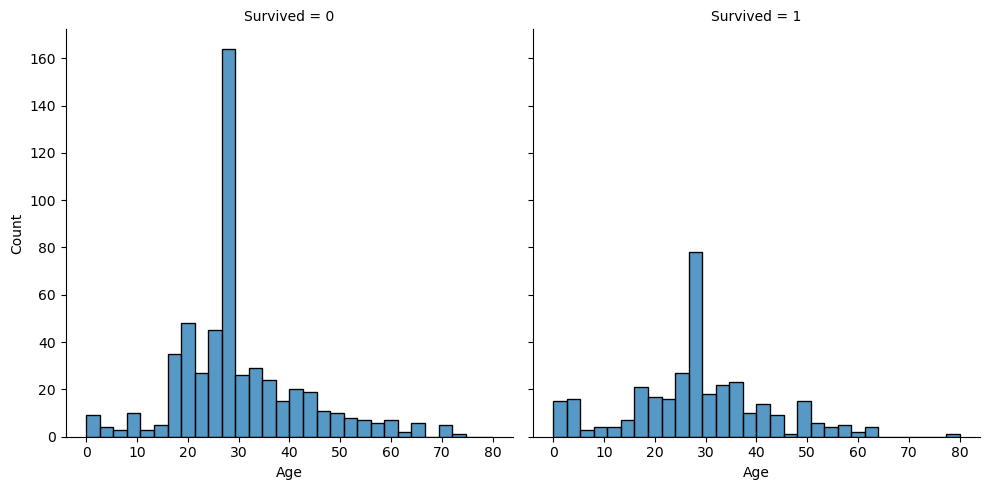

In [24]:
sns.displot(data=train,x='Age', col='Survived')

отсюда сложно сказать, что детей выжило больше, но скорее это связанно что их и так было меньше чем взрослых

-----
Из графиков выше понятно, что выживали в основном богатые женщины, а бедные мужчины умирали

Теперь попробую сгрупировать данные по некоторым признакам и посмотреть с этой стороны, вдруг увижу что-то еще

In [25]:
class_age = train.groupby('Pclass')['Age'].agg(['mean']).reset_index()
class_age

,Pclass,mean
0,1,36.944444
1,2,29.804348
2,3,26.191446


<AxesSubplot: xlabel='Pclass', ylabel='mean'>

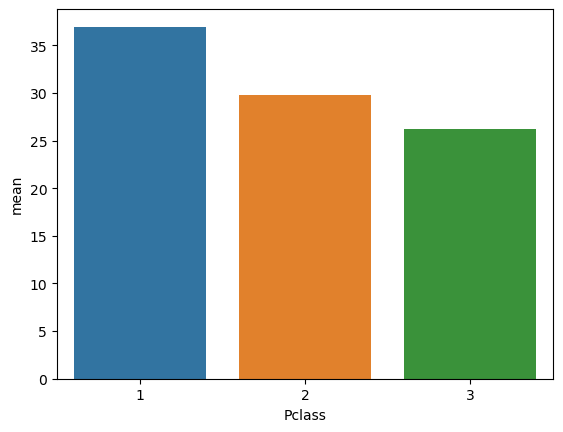

In [26]:
sns.barplot(data=class_age, x='Pclass', y='mean')

In [27]:
class_family = train.groupby('Pclass')['family'].agg(['mean']).reset_index()
class_family

,Pclass,mean
0,1,1.773148
1,2,1.782609
2,3,2.008147


<AxesSubplot: xlabel='Pclass', ylabel='mean'>

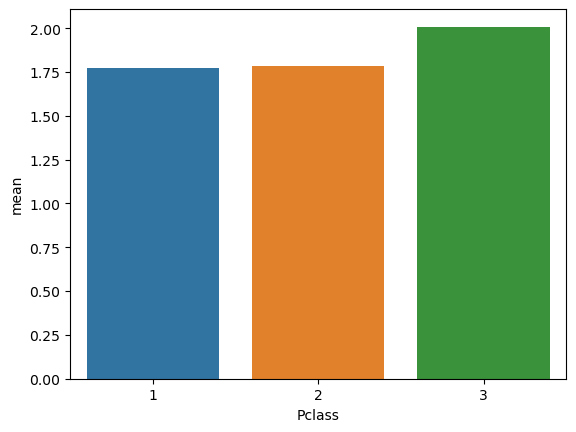

In [28]:
sns.barplot(data=class_family, x='Pclass', y='mean')

в 3 классе более молодые и с большим количеством родственников, хотя это не очень сильно выражено

вряд ли отсюда можно сделать какие-то выводы

In [29]:
class_sex = train.groupby(['Pclass', 'Sex_male'])['Survived'].agg(['mean']).reset_index()
class_sex

,Pclass,Sex_male,mean
0,1,0,0.968085
1,1,1,0.368852
2,2,0,0.921053
3,2,1,0.157407
4,3,0,0.500000
5,3,1,0.135447


<AxesSubplot: xlabel='Pclass', ylabel='mean'>

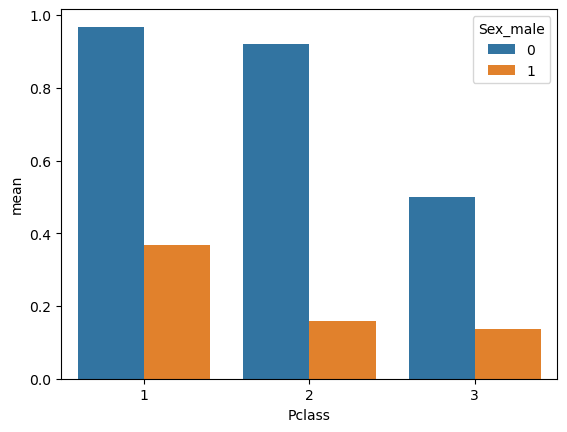

In [30]:
sns.barplot(data=class_sex, x='Pclass',y = 'mean',  hue='Sex_male')

отсюда видно что первый приоритет - пол, второй это класс каюты 

но что же с возрастом? давайте посмотрим

In [31]:
age = train.groupby('age_bins')['Survived'].agg(['mean']).reset_index()
age

,age_bins,mean
0,0,0.550000
1,1,0.344762
2,2,0.403226
3,3,0.434783
4,4,0.090909


<AxesSubplot: xlabel='age_bins', ylabel='mean'>

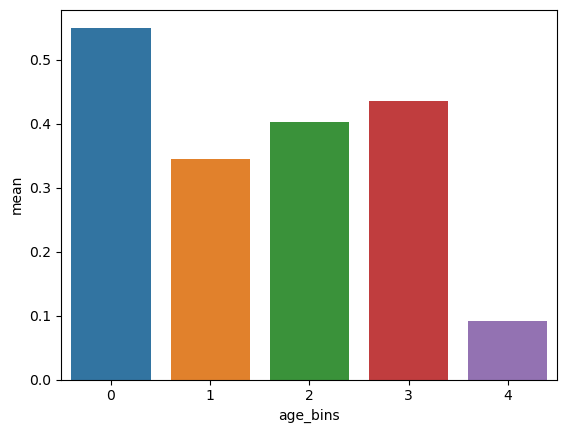

In [32]:
sns.barplot(data=age, x='age_bins', y='mean')

ну да, детей старались спасать активнее, но не намного, интересно , что у совсем стариков шансов мало, видимо в силу возраста они не такие активные 

----
###### Что в итоге:

на выживаемость влияет:
- пол 
- класс
- возраст

активнее всего спасали женщин и детей, причем богатые в первую очередь, потом идут мужчины, причем опять же, богатые в первую очередь

### Предсказание результата 